# Examination the house prices

> ### Make the data set meaningful and visualize.

`Importing the very useful library for data manipulation Pandas and for numerical operations numpy.`

In [1]:
import pandas as pd
import numpy as np

`Loading the dataset and assign it a variable.`

In [2]:
data=pd.read_excel("house_prices.xlsx")

`Browse the dataset for first look like features, how many units in there and types of features.`

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           4600 non-null   datetime64[ns]
 1   price          4600 non-null   int64         
 2   bedrooms       4600 non-null   int64         
 3   bathrooms      4600 non-null   int64         
 4   sqft_living    4600 non-null   int64         
 5   sqft_lot       4600 non-null   int64         
 6   floors         4600 non-null   int64         
 7   waterfront     4600 non-null   int64         
 8   view           4600 non-null   int64         
 9   condition      4600 non-null   int64         
 10  sqft_above     4600 non-null   int64         
 11  sqft_basement  4600 non-null   int64         
 12  yr_built       4600 non-null   int64         
 13  yr_renovated   4600 non-null   int64         
 14  street         4600 non-null   object        
 15  city           4600 n

`See, there are 18 features with integers datetime and object(string...) and we have 4600 units.`

`Lets assume there will be a project where prices are predicted and adapt the data accordingly.`

`It is given in the info section, but if we check it anyway, we can see that there is no null value so:`

In [4]:
data.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

`See there is no null unit here that we re not going to use imputing.`

`Now we can see the mean,std,min,max etc values of the features with the describe function.`

In [5]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,6.366566e+09,34.008696,91.588043,2139.346957,1.485252e+04,15.120652,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.269738e+10,9.088481,106.752936,963.206916,3.588444e+04,5.382884,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,10.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.278750e+06,30.000000,20.000000,1460.000000,5.000750e+03,10.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.710000e+06,30.000000,25.000000,1980.000000,7.683000e+03,15.000000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.725000e+06,40.000000,175.000000,2620.000000,1.100125e+04,20.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,9.508333e+11,90.000000,675.000000,13540.000000,1.074218e+06,35.000000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


`This output tells us a lot.We can see the mean value of yr_renovated feature is much lower than yr_built actually there isnt something wrong. The reason is in the data, non-renovated houses are marked with 0 just for this output cannot make correct inferences by looking at these parts. The std values are too much. We re going to use interquartile range method for removing the outliers and realizing the data. `

`There is a way for show the n number of smallest,largest units in selected feature.`

In [6]:
data.nsmallest(5,"price")

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4354,2014-05-05,0,30,175,1490,10125,10,0,0,4,1490,0,1962,0,3911 S 328th St,Federal Way,WA 98001,USA
4356,2014-05-05,0,40,275,2600,5390,10,0,0,4,1300,1300,1960,2001,2120 31st Ave W,Seattle,WA 98199,USA
4357,2014-05-05,0,60,275,3200,9200,10,0,2,4,1600,1600,1953,1983,12271 Marine View Dr SW,Burien,WA 98146,USA
4358,2014-05-06,0,50,35,3480,36615,20,0,0,4,2490,990,1983,0,21809 SE 38th Pl,Issaquah,WA 98075,USA
4361,2014-05-07,0,50,15,1500,7112,10,0,0,5,760,740,1920,0,14901-14999 12th Ave SW,Burien,WA 98166,USA


`It can show us there is some units that we shouldnt use.The 0 numbers. They can affect the solution but dont really mean anything numerically so we are going to remove them from the dataset.`

`There is so much way to filtering in pandas, wre going to use statements in brackets.`

In [7]:
data=data[data["price"]!=0]
print(data.shape)

(4551, 18)


`It can be seen here that the newer has less units than it.`

`Finally we came to the IQR(interquartile range) section.`

`There is a way that using quantile function for IQR computing so here is the algorithm for compute the IQR and remove the outliers. `

In [8]:
Q1=data.price.quantile(0.25)
Q3=data.price.quantile(0.75)
IQR=Q3-Q1
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
data2=data[(data["price"] > lower_limit)&(data["price"] < upper_limit)]
data2.shape

(4233, 18)

`We can see the change in the number of units so lets get look over the statistical values.By the way we did assign the new data as data2 for future comparision between old and new one.`

In [9]:
data2.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.233000e+03,4233.000000,4233.000000,4233.000000,4.233000e+03,4233.000000,4233.000000,4233.000000,4233.000000,4233.000000,4233.000000,4233.000000,4233.000000
mean,4.918566e+06,33.536499,87.864399,2036.627923,1.457518e+04,14.955115,0.004016,0.178124,3.445074,1750.014411,286.613513,1970.834869,810.917789
std,2.187687e+06,8.832598,101.503285,815.388828,3.606465e+04,5.372281,0.063253,0.653928,0.671363,766.060364,424.645228,29.596234,979.916784
min,7.800000e+04,0.000000,0.000000,370.000000,6.380000e+02,10.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.230000e+06,30.000000,20.000000,1440.000000,5.000000e+03,10.000000,0.000000,0.000000,3.000000,1170.000000,0.000000,1951.000000,0.000000
50%,4.520000e+06,30.000000,25.000000,1930.000000,7.568000e+03,15.000000,0.000000,0.000000,3.000000,1540.000000,0.000000,1976.000000,0.000000
75%,6.200000e+06,40.000000,175.000000,2510.000000,1.069800e+04,20.000000,0.000000,0.000000,4.000000,2200.000000,570.000000,1997.000000,1999.000000
max,1.190000e+07,90.000000,575.000000,7320.000000,1.074218e+06,35.000000,1.000000,4.000000,5.000000,7320.000000,2300.000000,2014.000000,2014.000000


`As shown below so much thing is changed like standard deviation in prices.`

`So we can import the matplotlib for visualising library for see that how the price linearity changed.`

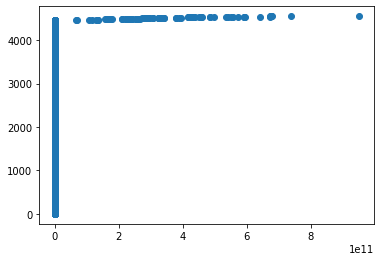

In [10]:
import matplotlib.pyplot as plt
data=data.sort_values("price",ascending=True)
data.reset_index(inplace=True,drop=True)
plt.scatter(x=data["price"],y=data.index)

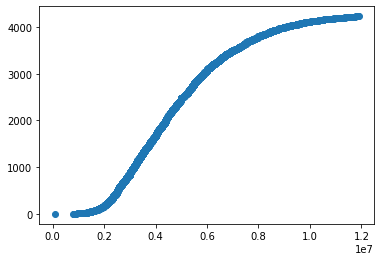

In [11]:
data2=data2.sort_values("price",ascending=True)
data2.reset_index(inplace=True,drop=True)
plt.scatter(x=data2["price"],y=data2.index)

`As seen in the figures, we obtained a more linear data set in terms of price thanks to IQR.`

In [12]:
data2.shape[0]/data.shape[0]*100

93.01252471984179

`We eliminated only 7% of the dataset with simple math and got a more meaningful dataset.`

# Visualize

> ### There is so much library for visualising in python, i found that the most used ones are matplotlib and seaborn.

`Let's take a look at the final version of our data.`

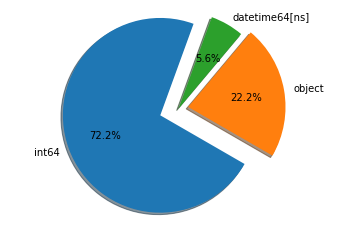

In [13]:
labels = data2.dtypes.value_counts().index
sizes = data2.dtypes.value_counts()
explode = (0.2, 0.1, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes,explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=70)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

`We've shown a summary of how widely used data types are in a pie chart, of course can add here a bar to show how much in it.`

In [14]:
ex=data2.groupby(data2.city).mean().price

`We grouped the data by cities and averaged them.This allowed us to chart the average price on each.`

<AxesSubplot:title={'center':'Average House Prices of Cities'}, xlabel='price', ylabel='city'>

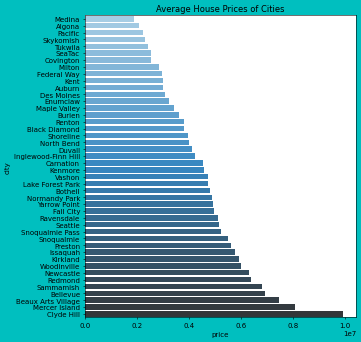

In [15]:
import seaborn as sbn
plt.figure( figsize=(7,8), dpi=50, facecolor='c', edgecolor='r',)
plt.title('Average House Prices of Cities')
sbn.barplot(x=ex.sort_values(),y=ex.sort_values().index,saturation=1, palette="Blues_d")

<AxesSubplot:title={'center':'Histogram of Data2 Prices'}, xlabel='price', ylabel='Count'>

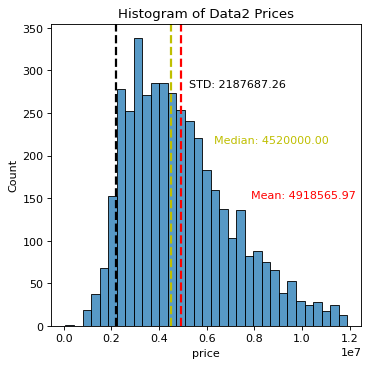

In [16]:
plt.figure( figsize=(5,5), dpi=80, facecolor='w')
min_ylim,max_ylim=plt.ylim()
plt.axvline(data2.price.mean(), color='r', linestyle='dashed', linewidth=2)
plt.text(data2.price.mean()*1.6, max_ylim*150, 'Mean: {:.2f}'.format(data2.price.mean()),color='r')

plt.axvline(data2.price.median(), color='y', linestyle='dashed', linewidth=2)
plt.text(data2.price.median()*1.4, max_ylim*215, 'Median: {:.2f}'.format(data2.price.median()),color='y')

plt.axvline(data2.price.std(), color='k', linestyle='dashed', linewidth=2)
plt.text(data2.price.std()*2.4, max_ylim*280, 'STD: {:.2f}'.format(data2.price.std()),color='k')

plt.title('Histogram of Data2 Prices')
sbn.histplot(data2.price)

`Here is the Histogram graph with mean median and standard deviation valus for prices in our final data.`

`After all of these , of course there is so much thing to show .This page contains an example for preprocessing a dataset for machine learning models and a few visualising techniques.`